In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




>



**Importing the libraries:**

In order to perform data preprocessing using Python, we need to import some predefined Python libraries.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

**Importing the dataset:**

To create a machine learning model, the first thing we required is a dataset as a machine learning model completely works on data. The collected data for a particular problem in a proper format is known as the dataset.

In [ ]:
dataset_path = '/content/drive/MyDrive/Datasets/avocado.csv'
df = pd.read_csv(dataset_path)

**Removing unnecessary columns**


In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True) #remove unnecessary columns

**Parsing the dates - splitting the date into day month and year (feature extraction)**

In [ ]:
# Parse Dates
df['Date'] = pd.to_datetime(df['Date'])

# Split 'Date' into 'Day', 'Month', and 'Year'
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Drop the original 'Date' column
df.drop(columns=['Date'], inplace=True)
df.drop(columns=['year'],inplace=True)

**Handling Missing values** :
calculating the missing value percentage

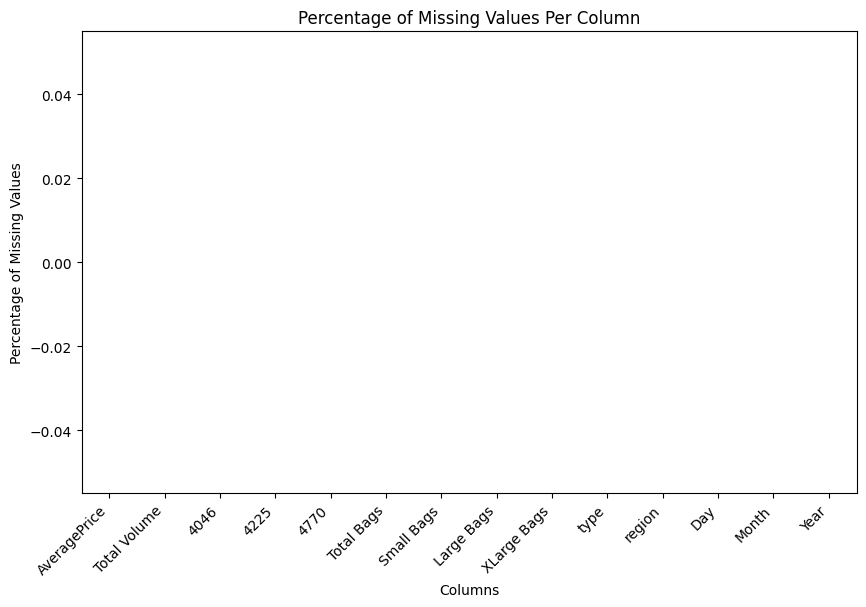

In [ ]:
missing_values = df.isnull().sum()
total_values = df.shape[0]
missing_percentage = (missing_values / total_values) * 100
# Plotting
missing_percentage.plot(kind='bar', figsize=(10, 6))
plt.title('Percentage of Missing Values Per Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=45, ha="right")
plt.show()

There are no missing values in any of the cloumns

**Calulating missing value percentage**

In [ ]:
# Display missing value percentages
print("\n\nPercentage of missing values in each column:")
print(missing_percentage)



Percentage of missing values in each column:
AveragePrice    0.0
Total Volume    0.0
4046            0.0
4225            0.0
4770            0.0
Total Bags      0.0
Small Bags      0.0
Large Bags      0.0
XLarge Bags     0.0
type            0.0
region          0.0
Day             0.0
Month           0.0
Year            0.0
dtype: float64


**Categorical encoding**


* **Label encoding for type column**


> Since there are only two categories in the type column (organic and conventional) , label encoding will represent one category as 0 and the other as 1.


> It effectively captures the information without introducing additional columns, and it can be more concise.







* **One hot encoding for region column**


> One-hot encoding for 'region' because regions are likely not ordinal and are better treated as independent categories.

> This creates binary columns (0 or 1) for each region, indicating whether the avocado belongs to that region or not.


> Also since there are many categories in the region column , label encoding will not be a suitable choice .















In [ ]:

# Categorical Data Encoding
df_encoded = pd.get_dummies(df, columns=['region'])

# Replace 'type' column with label encoding
le = LabelEncoder()
df_encoded['type'] = le.fit_transform(df['type'])

# Replace 'True' with 1 and 'False' with 0 for 'region' columns
region_columns = [col for col in df_encoded.columns if 'region_' in col]
df_encoded[region_columns] = df_encoded[region_columns].replace({True: 1, False: 0})

# Identify categorical and numerical features
categorical_features = df.select_dtypes(include=['object']).columns
numerical_features = df.select_dtypes(exclude=['object']).columns

**Displaying the categorical and numerical features in the avocado dataset**

In [ ]:
# Display the results
print("Categorical Features:")
print(categorical_features)

print("\nNumerical Features:")
print(numerical_features)

Categorical Features:
Index(['type', 'region'], dtype='object')

Numerical Features:
Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'Day', 'Month', 'Year'],
      dtype='object')


**Feature scaling for numerical columns in the dataset**

*   **Normalization for other numerical columns**


> Normalization brings all numerical features to a common scale, typically between 0 and 1. This ensures that all features contribute equally to the model, preventing features with larger scales from dominating the learning process.





In [ ]:

numerical_cols = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
                   'Small Bags', 'Large Bags', 'XLarge Bags']

min_max_scaler = MinMaxScaler()
# Apply Min-Max scaling to the numerical columns
df_encoded[numerical_cols] = min_max_scaler.fit_transform(df_encoded[numerical_cols])

**Displaying the box plot for numerical features before handling outliers**

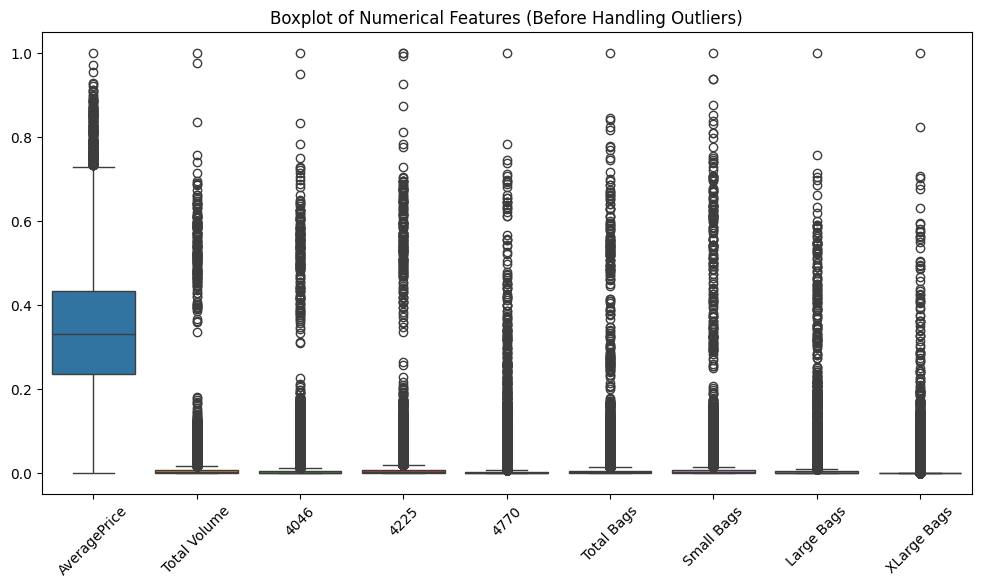

In [ ]:
# Display box plot before handling outliers
plt.figure(figsize=(12, 6))
plt.title("Boxplot of Numerical Features (Before Handling Outliers)")
sns.boxplot(data=df_encoded[numerical_cols ])
plt.xticks(rotation=45)
plt.show()

The boxplot before handling outliers shows the presence of several outliers, primarily above the upper quartile.


**Outlier Detection and Handling**

In [ ]:
for col in numerical_cols:
    # Calculate the IQR for the current column
    Q1 = df_encoded[col].quantile(0.25)
    Q3 = df_encoded[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify and handle outliers by clipping values
    df_encoded[col] = np.clip(df_encoded[col], lower_bound, upper_bound)

**Interquartile Range (IQR) method**


*   Calculate the first quartile (Q1), third quartile (Q3), and the interquartile range (IQR).
*   Define the lower and upper bounds for identifying outliers based on the IQR.

*  Clip values in the column to be within the range defined by the lower and upper bounds.




> We can apply a method such as trimming (removing outliers) or capping (limiting outlier values).

> Capping might be more appropriate to retain as much data as possible and
limiting values to within a specified range beyond the 1st and 3rd quartiles.





**Box plot after handling outliers**

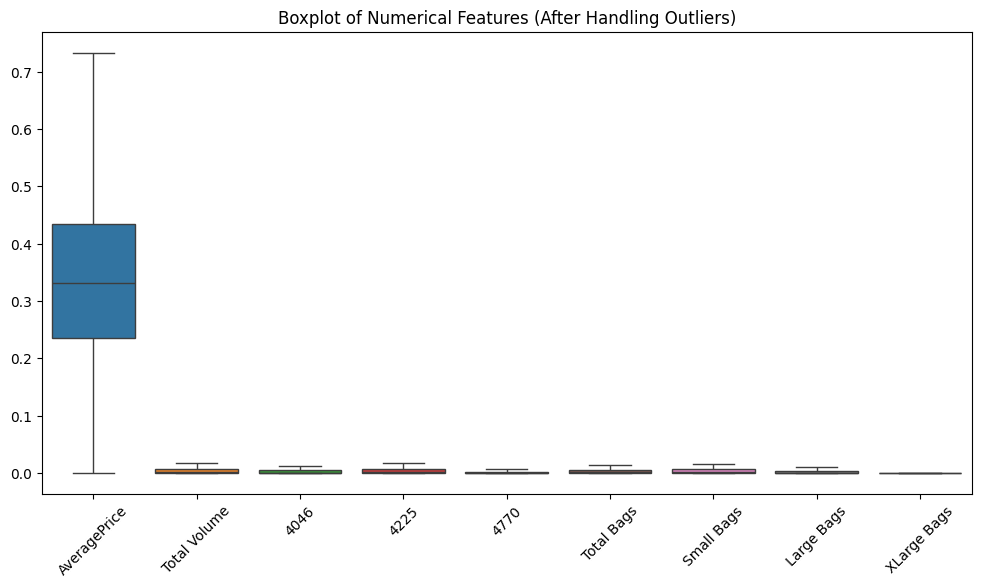

In [ ]:
# Display box plot after handling outliers
plt.figure(figsize=(12, 6))
plt.title("Boxplot of Numerical Features (After Handling Outliers)")
sns.boxplot(data=df_encoded[numerical_cols ])
plt.xticks(rotation=45)
plt.show()

The boxplot after handling outliers shows that the outlier values have been capped at the upper and lower bounds, resulting in a cleaner distribution without extreme outliers.



**Data Spliting**

> Here, the data is split into training and testing sets using the train_test_split function from scikit-learn.
*   X variable  ->  the features (independent variables).
*   y  ->  target variable (dependent variable), which is 'AveragePrice' in this case.

> The test_size parameter is set to 0.2, indicating that 20% of the data will be used for testing, and the remaining 80% will be used for training.







In [ ]:
# Data Splitting
X = df_encoded.drop(['AveragePrice'], axis=1)
y = df_encoded['AveragePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



> X_train: The training set features.

> X_test: The testing set features.

> y_train: The training set target values.

> y_test: The testing set target values.











In [ ]:
# Print the shapes of the final output
print("Training set features shape:", X_train.shape)
print("Testing set features shape:", X_test.shape)
print("Training set target shape:", y_train.shape)
print("Testing set target shape:", y_test.shape)


Training set features shape: (14599, 66)
Testing set features shape: (3650, 66)
Training set target shape: (14599,)
Testing set target shape: (3650,)


**Saving the preprocessed training dataset**

In [ ]:
# Save the preprocessed training dataset to a new CSV file
train_dataset_path = '/content/drive/MyDrive/Datasets/avocado_train_preprocessed.csv'
df_train_preprocessed = pd.concat([X_train, y_train], axis=1)
df_train_preprocessed.to_csv(train_dataset_path, index=False)
print(f"Training set saved to: {train_dataset_path}")
# Display first few rows of the training set to show the outcome
print("\nFirst few rows of the training set:")
print(df_train_preprocessed.head())



Training set saved to: /content/drive/MyDrive/Datasets/avocado_train_preprocessed.csv

First few rows of the training set:
       Total Volume      4046      4225      4770  Total Bags  Small Bags  \
16391      0.000085  0.000006  0.000043  0.000000    0.000225    0.000325   
4990       0.009256  0.006839  0.007476  0.006130    0.012828    0.010818   
13653      0.000102  0.000089  0.000124  0.000000    0.000099    0.000138   
2074       0.002329  0.003438  0.001894  0.000053    0.001474    0.001941   
12377      0.000647  0.000007  0.001889  0.000000    0.000088    0.000127   

       Large Bags  XLarge Bags  type  Day  ...  region_SouthCentral  \
16391    0.000001          0.0     1   12  ...                    0   
4990     0.009596          0.0     0   10  ...                    0   
13653    0.000012          0.0     1   27  ...                    0   
2074     0.000450          0.0     0    8  ...                    0   
12377    0.000000          0.0     1   12  ...             

**Saving the preprocessed test dataset**

In [ ]:
# Save the preprocessed test dataset to a new CSV file
test_dataset_path = '/content/drive/MyDrive/Datasets/avocado_test_preprocessed.csv'
df_test_preprocessed = pd.concat([X_test, y_test], axis=1)
df_test_preprocessed.to_csv(test_dataset_path, index=False)
print(f"Testing set saved to: {test_dataset_path}")
# Display first few rows of the training set to show the outcome
print("\nFirst few rows of the test set:")
print(df_test_preprocessed.head())

Testing set saved to: /content/drive/MyDrive/Datasets/avocado_test_preprocessed.csv

First few rows of the test set:
       Total Volume      4046          4225      4770  Total Bags  Small Bags  \
8604       0.003492  0.003484  1.287509e-03  0.001178    0.005664    0.005483   
2608       0.006262  0.010039  3.553852e-03  0.000040    0.004663    0.003321   
14581      0.000061  0.000050  1.930088e-06  0.000000    0.000140    0.000203   
4254       0.004286  0.006630  1.320211e-03  0.000222    0.004624    0.005578   
16588      0.000140  0.000036  1.582760e-07  0.000000    0.000412    0.000557   

         Large Bags  XLarge Bags  type  Day  ...  region_SouthCentral  \
8604   6.004265e-03       0.0006     0   11  ...                    0   
2608   8.024140e-03       0.0000     0    1  ...                    0   
14581  5.822598e-07       0.0000     1   24  ...                    0   
4254   2.607342e-03       0.0000     0    6  ...                    0   
16588  9.043736e-05       0.000

**Display distribution plots after handling outliers**

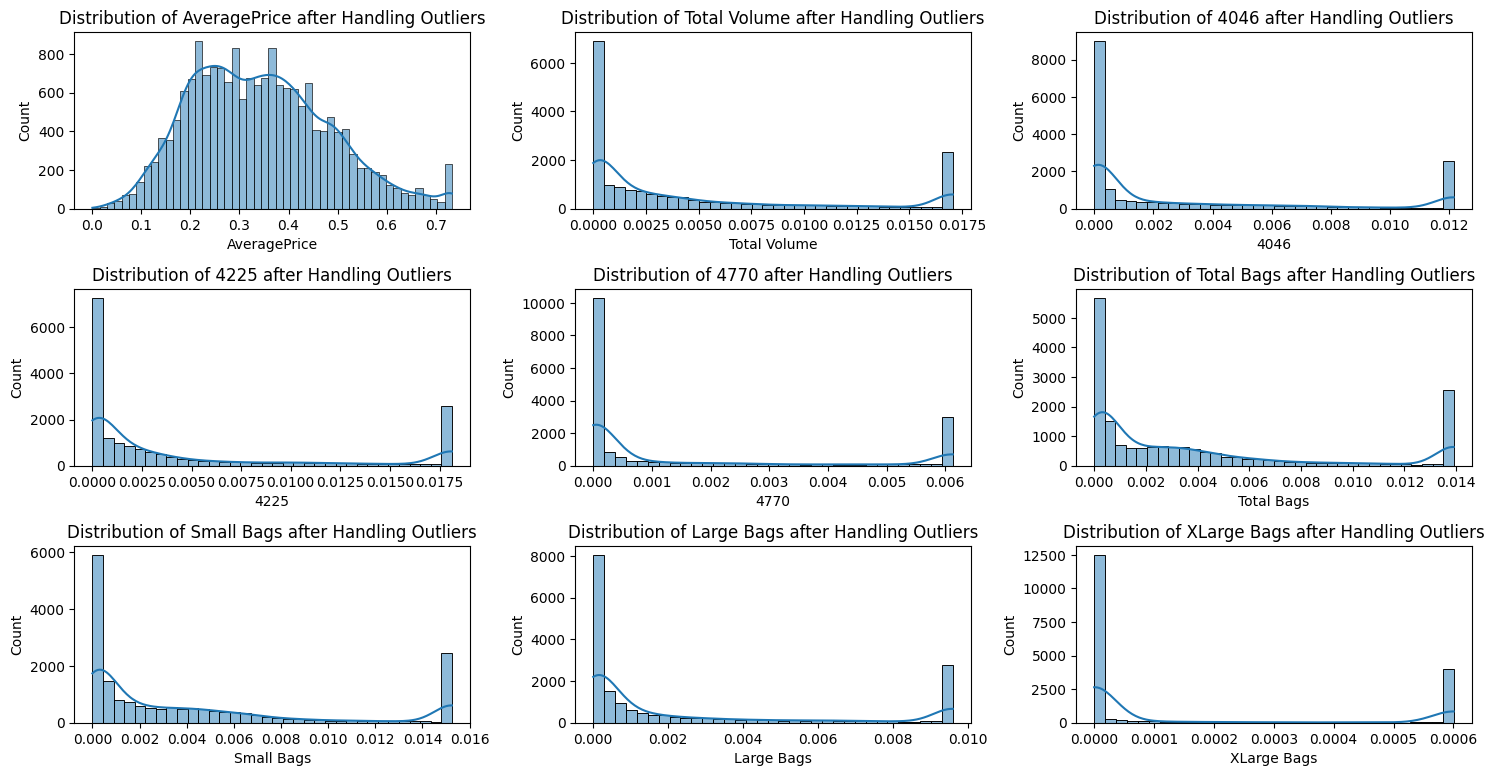

In [ ]:
# Display distribution plots after handling outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)  # Increase the grid size
    sns.histplot(df_encoded[col], kde=True)
    plt.title(f'Distribution of {col} after Handling Outliers')

plt.tight_layout()
plt.show()


**Inferences**



1.   Distribution of AveragePrice after Handling Outliers:

This histogram shows a relatively normal distribution, slightly left-skewed, indicating that most of the data points for AveragePrice fall near the center of the range.
There are peaks at both tails of the distribution, suggesting some potential outliers or a bimodal nature.
2.   Distribution of Total Volume after Handling Outliers:

The data is highly skewed to the right, with a concentration of data points near zero and a long tail extending to the right.
This suggests that while most of the volumes are low, there are a few instances with very high volume.


3.   Distribution of 4046 after Handling Outliers:

Similar to Total Volume, this variable is also right-skewed with most data points clustered near the lower end.
4.  Distribution of Total Bags after Handling Outliers:

Again, a right-skewed distribution, indicating most of the data points are low in value with some larger values extending to the right.


5.   Distribution of Small Bags after Handling Outliers:

This histogram is also right-skewed, very similar to the Total Bags distribution, suggesting that Small Bags make up a significant part of Total Bags.
6.   Distribution of Large Bags after Handling Outliers:

This is right-skewed, but less extreme than Small Bags, indicating a lower frequency of higher values.


7.   Distribution of XLarge Bags after Handling Outliers:

This distribution is also right-skewed and shows a very sharp peak near zero, suggesting that XLarge Bags are less common than Small or Large Bags.












**EXPLORATORY DATA ANALYSIS QUESTIONS**

In [ ]:
# Calculate the mean 'AveragePrice' for each region
avg_prices_by_region = df.groupby('region')['AveragePrice'].mean().reset_index()

# Sort the DataFrame by average price in descending order to identify regions with the highest prices
highest_prices = avg_prices_by_region.sort_values(by='AveragePrice', ascending=False).head(5)

# Sort the DataFrame by average price in ascending order to identify regions with the lowest prices
lowest_prices = avg_prices_by_region.sort_values(by='AveragePrice').head(5)

**1.   Which region has the highest average price ?**




In [ ]:
# Plot the bar chart for the highest average prices
plt.figure(figsize=(12, 6))
sns.barplot(x='AveragePrice', y='region', data=highest_prices, palette='viridis', hue='region', legend=False)
plt.title('Regions with Highest Average Avocado Prices')
plt.xlabel('Average Price')
plt.ylabel('Region')
plt.show()



**Answer :**
*   HartfordSpringfield, with an average price of $1.75 has the highest average price .






**2. Which region has the lowest average price ?**

In [ ]:
# Plot the bar chart for the lowest average prices
plt.figure(figsize=(12, 6))
sns.barplot(x='AveragePrice', y='region', data=lowest_prices, palette='viridis', hue='region', legend=False)
plt.title('Regions with Lowest Average Avocado Prices')
plt.xlabel('Average Price')
plt.ylabel('Region')
plt.show()

**Answer:**
*   Houston with an average price slightly higher than 1.0 has the lowest
average price

**3. When does the average price of avocado increases steeply and when does it decreases steeply ?**

In [ ]:
# Calculate the average prices per year
avg_prices_per_year = df.groupby('Year')['AveragePrice'].mean().reset_index()

# Plot the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='AveragePrice', data=avg_prices_per_year, marker='o', color='b')
plt.title('Average Avocado Prices Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

**Answer :**

1.   The average price of avocado increases steeply between the years 2016 to 2017

2.   The average price of avocado decreases steeply between the years 2017 to 2018



**4. Show Average avocado prices over the years for each region**

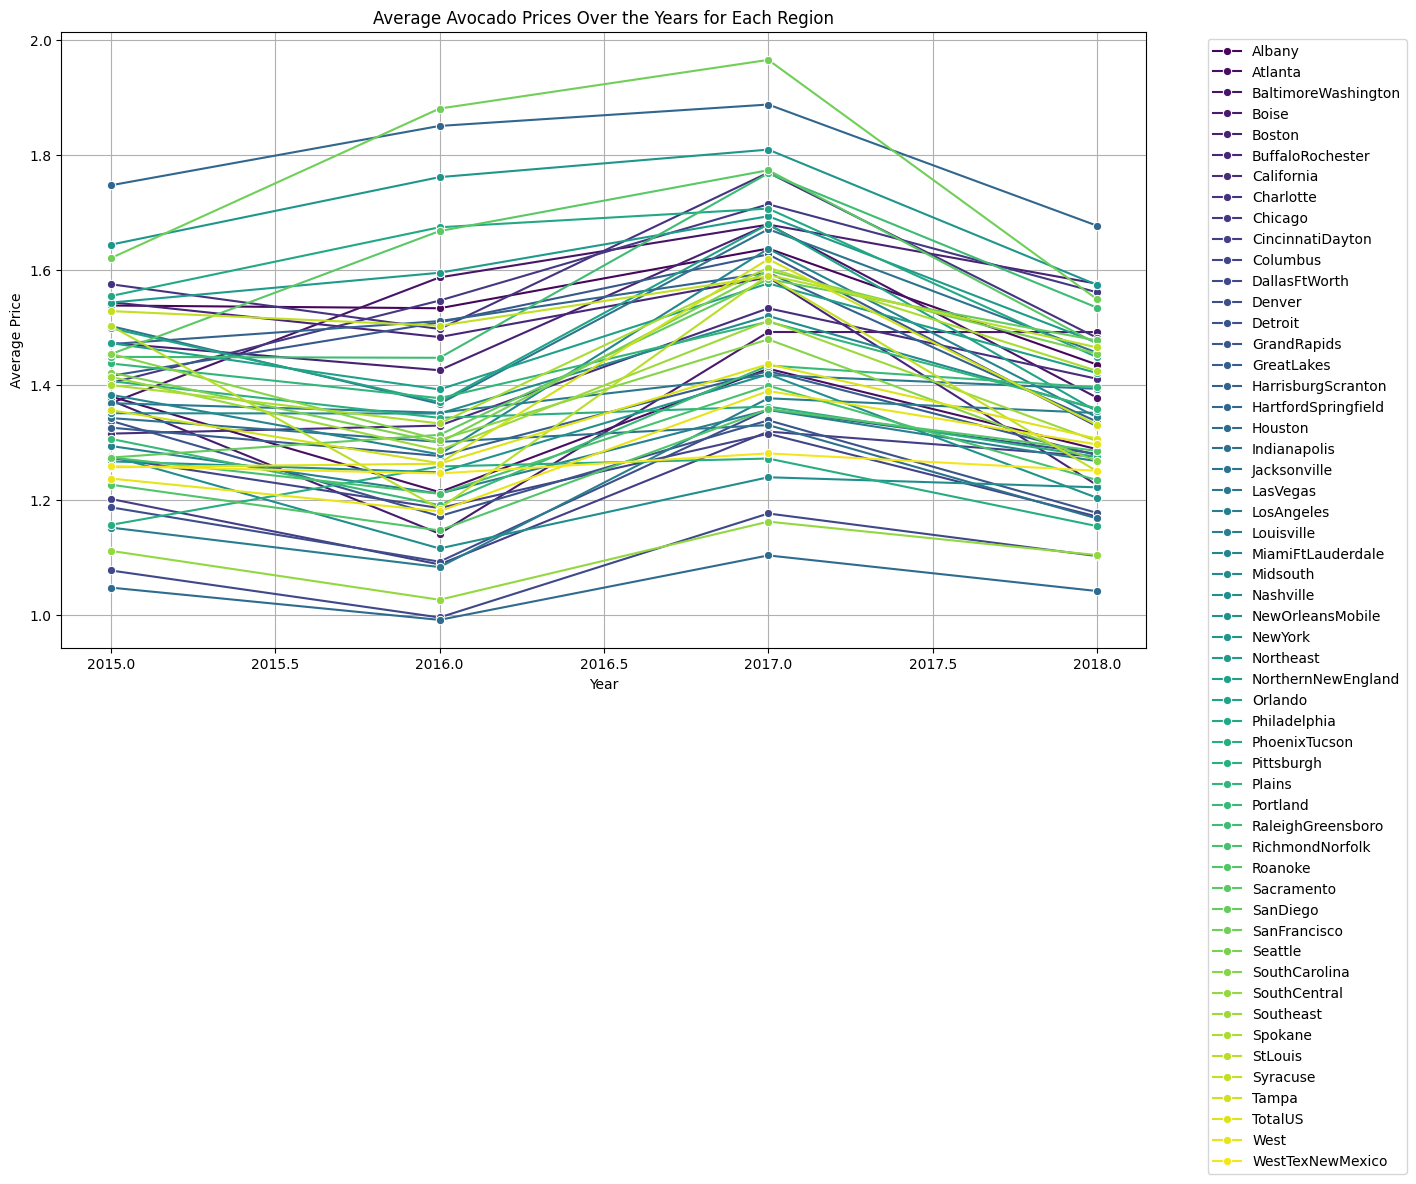

In [ ]:
# Calculate the average prices per region and year
avg_prices_per_region_year = df.groupby(['region', 'Year'])['AveragePrice'].mean().reset_index()

# Plot line charts for each region
plt.figure(figsize=(14, 8))
sns.lineplot(x='Year', y='AveragePrice', hue='region', data=avg_prices_per_region_year, palette='viridis', marker='o')
plt.title('Average Avocado Prices Over the Years for Each Region')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

**Inferences**

The average of avocados fluctuates over time, with some years experiencing significant price changes. For instance, the West region saw a drop in average price from 2015 to 2016, followed by a slight increase in 2017 and another decrease in 2018.

Overall, the data suggests that the average price of avocados is not uniform across regions and can change over time.

**5. How do the average prices of organic and conventional avocados compare?**

In [ ]:

# Calculate the average avocado price for Organic and Conventional types
avg_prices_by_type = df.groupby('type')['AveragePrice'].mean().reset_index()

# Plot bar chart to compare average prices for Organic and Conventional avocados
plt.figure(figsize=(8, 6))
sns.barplot(x='type', y='AveragePrice', hue='type', data=avg_prices_by_type, palette='viridis', legend=False)
plt.title('Average Avocado Prices for Organic vs. Conventional')
plt.xlabel('Avocado Type')
plt.ylabel('Average Price')
plt.show()



**Inferences:**

There are very few avocados in the highest price range above 1.2 range for organic avocados and none in the conventional avocado category.

Hence Organic avocados are more expensive on average than conventional avocados.






**6. Compare volume trends for Organic and Conventional avocados**

In [ ]:

plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='Total Volume', hue='type', data=df, palette='viridis')
plt.title('Volume Trends for Organic vs. Conventional Avocados')
plt.xlabel('Year')
plt.ylabel('Total Volume')
plt.show()

**Inferences**

Conventional avocados have a much higher sales volume than organic avocados throughout the period shown.

Both organic and conventional avocados exhibit a growth trend in sales volume over the years, with organic avocados showing a sharp increase around 2017.

Despite the lower volume, the increasing trend for organic avocados suggests a rising consumer interest or demand for organic options.



**7. Analyse the average price range  vs the bag size**

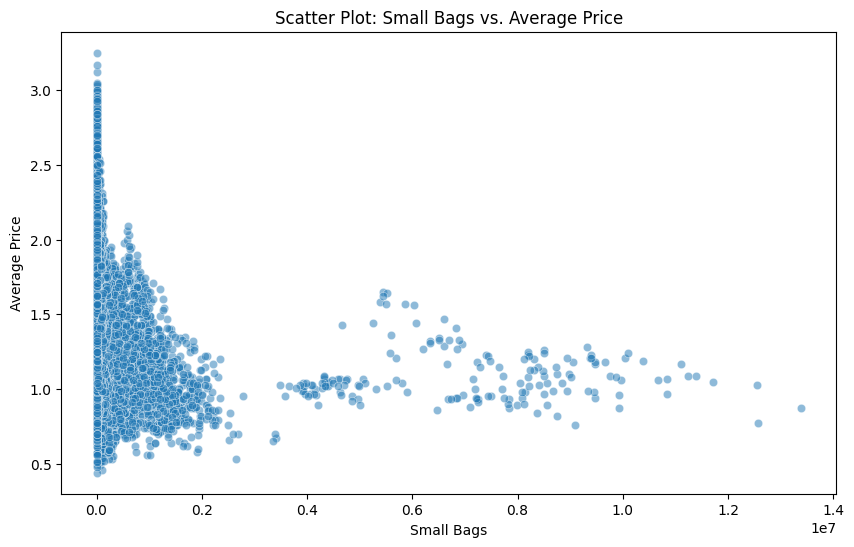

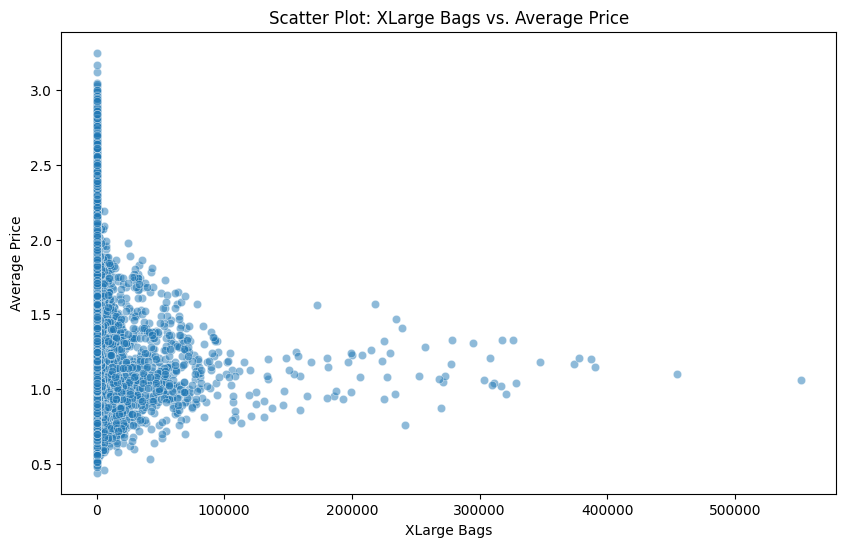

In [ ]:

# Select relevant columns for analysis
bag_size_cols = ['Small Bags', 'Large Bags', 'XLarge Bags']
price_col = 'AveragePrice'

# Create a DataFrame for bag size and average price
df_bag_size = df[bag_size_cols + [price_col]]



# Scatter plots to visualize the relationship between bag size and average price
for bag_size in bag_size_cols:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=bag_size, y=price_col, data=df_bag_size, alpha=0.5)
    plt.title(f'Scatter Plot: {bag_size} vs. Average Price')
    plt.xlabel(bag_size)
    plt.ylabel('Average Price')
    plt.show()



**Inferences:**

**Small bags vs Average price**

**Negative Correlation:** There appears to be a negative correlation between the number of small bags and the average price. As the number of small bags increases, the average price tends to decrease.

**Large bags vs Average price**

**Negative Correlation:** Similar to the previous plot with small bags, there is a negative correlation between the number of large bags and the average price. As the number of large bags increases, the average price tends to decrease, though the relationship seems less steep here.

**XLarge bags vs Average price**

**Volume Discounting:** There is a visible trend that as the number of large bags increases, the average price decreases, indicative of volume discounting strategies where buying in bulk is cheaper.
